In [373]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.optimizers import Adam

from sklearn.utils import resample

import os
import numpy as np
from PIL import Image

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical

In [433]:
def get_numpy_images(path_to_img, no_sample=True):
    import os
    import numpy as np
    from PIL import Image
    # get all images from path
    img_list = os.listdir(path_to_img)
    img_list.sort()
    # create empty list for numpy images
    img_list_np = []
    # loop over all images
    for img in img_list:
        # check if image filename contains "sample0"
        if "sample0" in img or no_sample:
            # open image
            img_open = Image.open(path_to_img + '/' + img)
            # convert image to numpy array
            img_np = np.asarray(img_open)
            # append numpy image to list
            img_list_np.append(img_np)

    # return list of numpy images
    return img_list_np

In [445]:
path_to_img='/Users/thomasgaehtgens/Downloads/images_4'
path_to_y  ='/Users/thomasgaehtgens/Desktop/level_04/train_data_labels.csv'
img = np.array(get_numpy_images(path_to_img))

# load labels with numpy
y = np.loadtxt(path_to_y, delimiter=',')

# concatenate y and y2 along the first axis
# y = np.concatenate((y, y2), axis=0)

In [446]:
# same for test data
path_to_img_test='/Users/thomasgaehtgens/Downloads/images_test_4'
test_img = np.array(get_numpy_images(path_to_img_test))

In [447]:
# function that replaces pixels with rgb(255,255,255) with values (77, 192, 52)
def replace_white(img_array):
    mask = (img_array == [255, 255, 255]).all(axis=3)
    img_array[mask] = np.ones_like(img_array[mask]) * [77, 192, 52]
    return img_array

In [448]:
img = replace_white(img)
test_img = replace_white(test_img)

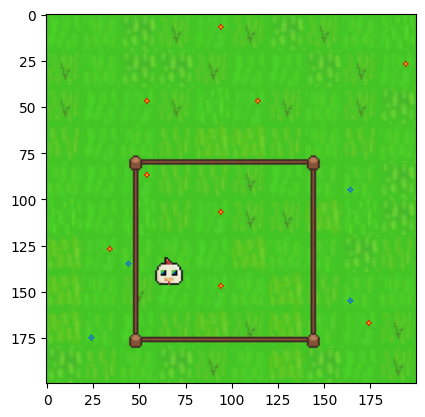

In [449]:
plt.imshow(img[0])

In [450]:
# function that resized images to 64x64
def resize_images(img, size=(64,64)):
    from PIL import Image
    # create empty list for resized images
    img_resized = []
    # loop over all images
    for i in range(len(img)):
        # resize image to 64x64
        img_resized.append(np.array(Image.fromarray(img[i]).resize(size)))
    # return list of resized images
    return img_resized

In [451]:
size=(200, 200)

resized_img = resize_images(img, size=size)
resize_test = resize_images(test_img, size=size)

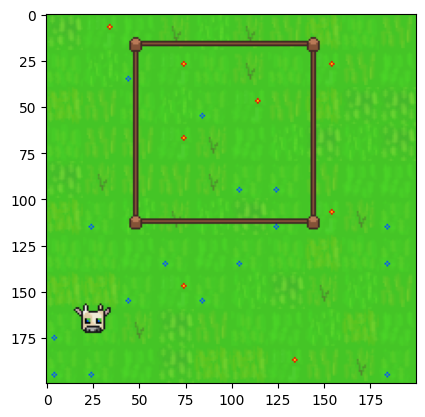

In [452]:
plt.imshow(resized_img[9])

(array([[61., 62., 38., 51., 48., 40., 60., 44., 45., 51.],
        [47., 54., 39., 60., 52., 47., 57., 34., 49., 61.]]),
 array([ 18. ,  34.3,  50.6,  66.9,  83.2,  99.5, 115.8, 132.1, 148.4,
        164.7, 181. ]),
 <a list of 2 BarContainer objects>)

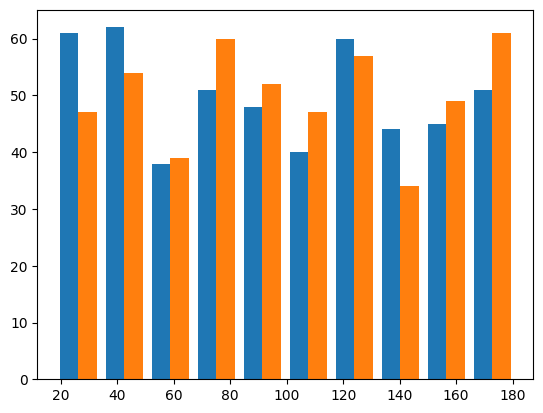

In [453]:
y = y.astype(int)
# y histogram
plt.hist(y)

In [454]:
# create model
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(size[0],size[1],3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

# compile model using accuracy to measure model performance
model.compile(optimizer=Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


# REGRESSION

# create model
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(size[0],size[1],3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='linear')
])

# compile model using mean squared error to measure model performance
model.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error', 
              metrics=['mse'])


In [455]:
np.array(resized_img).shape

(500, 200, 200, 3)

In [456]:
# REGRESSION
# train the model
model.fit(np.array(resized_img), 
          y, 
          validation_split=0.05, 
          epochs=8,
          batch_size=32)

'''
# CLASSIFICATION
# train the model
model.fit(np.array(resized_img), 
          to_categorical(y), 
          validation_split=0.2, 
          epochs=10)
'''

Epoch 1/8
15/15 [==============================] - 25s 2s/step - loss: 17051.9004 - mse: 17051.9004 - val_loss: 2631.2883 - val_mse: 2631.2883
Epoch 2/8
15/15 [==============================] - 18s 1s/step - loss: 2425.6243 - mse: 2425.6243 - val_loss: 2399.8569 - val_mse: 2399.8569
Epoch 3/8
15/15 [==============================] - 26s 2s/step - loss: 1991.9214 - mse: 1991.9214 - val_loss: 914.3931 - val_mse: 914.3931
Epoch 4/8
15/15 [==============================] - 29s 2s/step - loss: 479.9620 - mse: 479.9620 - val_loss: 260.4625 - val_mse: 260.4625
Epoch 5/8
15/15 [==============================] - 25s 2s/step - loss: 140.3291 - mse: 140.3291 - val_loss: 92.2010 - val_mse: 92.2010
Epoch 6/8
15/15 [==============================] - 23s 2s/step - loss: 62.3553 - mse: 62.3553 - val_loss: 66.6966 - val_mse: 66.6966
Epoch 7/8
15/15 [==============================] - 21s 1s/step - loss: 45.0571 - mse: 45.0571 - val_loss: 66.7825 - val_mse: 66.7825
Epoch 8/8
15/15 [======================

'\n# CLASSIFICATION\n# train the model\nmodel.fit(np.array(resized_img), \n          to_categorical(y), \n          validation_split=0.2, \n          epochs=10)\n'

In [457]:

# REGRESSION

# predict values for test set
y_pred = model.predict(np.array(resize_test))

# round values to the closest integer between 0 and 5
y_pred_rounded = np.round(y_pred)
#y_pred_rounded = np.clip(y_pred_rounded, 0, 5)

# save y_pred_rounded as .txt file
np.savetxt('y_pred_rounded_4.txt', y_pred_rounded, delimiter=',', fmt='%d')
'''

# CLASSIFICATION

# predict class probabilities for test set
y_pred = model.predict(np.array(resize_test))

# get predicted class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# save y_pred_labels as .txt file
np.savetxt('y_pred_labels.txt', y_pred_labels, delimiter=',', fmt='%d')
'''

32/32 [==============================] - 13s 366ms/step


"\n\n# CLASSIFICATION\n\n# predict class probabilities for test set\ny_pred = model.predict(np.array(resize_test))\n\n# get predicted class labels\ny_pred_labels = np.argmax(y_pred, axis=1)\n\n# save y_pred_labels as .txt file\nnp.savetxt('y_pred_labels.txt', y_pred_labels, delimiter=',', fmt='%d')\n"

In [458]:
    y_pred_rounded

array([[ 24.,  46.],
       [ 28., 137.],
       [ 30., 141.],
       ...,
       [120.,  82.],
       [127., 179.],
       [179., 179.]], dtype=float32)

In [220]:
# CLASSIFICATION

# actual results for first 4 images in test set
y_pred_prob = model.predict(np.array(resize_test))

# predict class labels based on highest probability
y_pred = np.argmax(y_pred_prob, axis=1)

#save y_pred as .txt file
np.savetxt('y_pred.txt', y_pred, delimiter=',', fmt='%d')


32/32 [==============================] - 2s 41ms/step


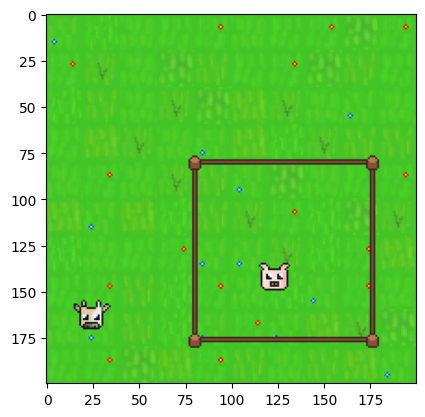

In [128]:
plt.imshow(resize_test[0])

In [41]:
y_pred = model.predict(np.array(resize_test))

32/32 [==============================] - 1s 31ms/step


In [42]:
#save y_pred as .txt file
np.savetxt('y_pred.txt', y_pred, delimiter=',', fmt='%d')

In [44]:
y_pred[:20]

array([[4.9316879e-09, 9.9999994e-01],
       [2.7828995e-10, 9.9999994e-01],
       [2.7470346e-09, 9.9999994e-01],
       [5.7424085e-08, 9.9999994e-01],
       [9.8562154e-09, 9.9999994e-01],
       [3.1635050e-10, 9.9999994e-01],
       [8.3380701e-07, 9.9999911e-01],
       [5.7024521e-11, 9.9999994e-01],
       [9.7701957e-08, 9.9999982e-01],
       [3.2200242e-09, 9.9999994e-01],
       [3.8325698e-09, 9.9999994e-01],
       [6.4266914e-08, 9.9999982e-01],
       [6.6493935e-11, 9.9999994e-01],
       [1.5812345e-08, 9.9999994e-01],
       [1.2123362e-10, 9.9999994e-01],
       [4.8819521e-10, 9.9999994e-01],
       [3.3240737e-11, 9.9999994e-01],
       [2.3846614e-10, 9.9999994e-01],
       [2.2545925e-11, 9.9999994e-01],
       [1.0212113e-09, 9.9999994e-01]], dtype=float32)

In [368]:
import xgboost as xgb

# create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=5, n_estimators=100)

# train the model
model.fit(np.array(resized_img).reshape(-1, size[0]*size[1]*3), y)

# predict values for test set
y_pred = model.predict(np.array(resize_test).reshape(-1, size[0]*size[1]*3))

# save y_pred as .txt file
np.savetxt('y_pred_xgb.txt', y_pred, delimiter=',')

In [369]:
y_pred

array([1.6866598, 1.9504322, 2.1152456, 2.700478 , 2.3254268, 1.9406627,
       1.9149173, 2.6922908, 2.0386395, 2.7284749, 1.3508947, 2.3644483,
       2.687522 , 2.2614584, 2.0496874, 2.1423256, 2.2111013, 2.3044777,
       2.5328062, 2.6326847, 2.2137165, 2.562942 , 2.0876408, 1.6189212,
       1.925881 , 2.2627485, 2.387137 , 2.8215332, 3.3600445, 1.2477785,
       1.6127433, 2.0478115, 2.4246213, 1.5662229, 2.7629225, 2.682112 ,
       3.4298193, 1.5102652, 2.3579   , 1.9893547, 2.4222791, 3.0201015,
       2.0098083, 2.1026583, 2.9188254, 3.0245004, 2.5796876, 1.7698188,
       2.6372938, 3.0830216, 2.6623285, 2.2869246, 2.5696402, 2.8200288,
       2.747184 , 2.631281 , 2.415284 , 2.7491007, 2.4948123, 2.5183828,
       2.3767686, 2.4174194, 2.7502484, 2.1415346, 2.3544676, 2.830158 ,
       2.2282484, 2.5566516, 1.9925796, 1.6959822, 2.3857164, 2.961359 ,
       2.2246842, 2.671383 , 2.6215734, 1.8418456, 2.2640412, 2.783227 ,
       1.7450176, 2.7496502, 1.9670978, 2.3355634, 

In [371]:
from sklearn.preprocessing import StandardScaler

# create scaler object
scaler = StandardScaler()

# fit scaler on training data
scaler.fit(np.array(resized_img).reshape(-1, size[0]*size[1]*3))

# transform training and test data
X_train_scaled = scaler.transform(np.array(resized_img).reshape(-1, size[0]*size[1]*3))
X_test_scaled = scaler.transform(np.array(resize_test).reshape(-1, size[0]*size[1]*3))

# train model on scaled data
model.fit(X_train_scaled, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [372]:
# predict values for test set
y_pred = model.predict(np.array(resize_test).reshape(-1, size[0]*size[1]*3))

y_pred

array([2.4420028, 2.4420028, 2.4400334, 2.4520283, 2.4420028, 2.4420028,
       2.4520283, 2.4420028, 2.4420028, 2.5526423, 2.5371366, 2.4420028,
       2.4420028, 2.4520283, 2.530788 , 2.4420028, 2.4400334, 2.4420028,
       2.4420028, 2.491662 , 2.4420028, 2.4572325, 2.4420028, 2.5526423,
       2.4520283, 2.4420028, 2.4420028, 2.4420028, 2.4420028, 2.5626678,
       2.4520283, 2.4764318, 2.4400334, 2.4420028, 2.4572325, 2.4420028,
       2.4420028, 2.4664063, 2.4420028, 2.4420028, 2.2954817, 2.4664063,
       2.4420028, 2.476021 , 2.3842669, 2.4400334, 2.4420028, 2.516756 ,
       2.4420028, 2.2571967, 2.4420028, 2.4744625, 2.5209615, 2.4400334,
       2.4420028, 2.4420028, 2.4420028, 2.4420028, 2.4766123, 2.4552631,
       2.2855859, 2.4520283, 2.4420028, 2.4420028, 2.4420028, 2.4034753,
       2.4420028, 2.4420028, 2.4420028, 2.4400334, 2.5526423, 2.4420028,
       2.5770464, 2.4420028, 2.4420028, 2.4420028, 2.5526423, 2.4775624,
       2.4420028, 2.4420028, 2.4572325, 2.4664063, 

In [459]:
def get_rgb_points(rgb, pic):
    points = []
    for i in range(len(pic)):
        for j in range(len(pic[0])):
            if pic[i,j,0] == rgb[0] and pic[i,j,1] == rgb[1] and pic[i,j,2] == rgb[2]:
                points.append([i,j])
    return points

In [466]:
import os
import numpy as np
from PIL import Image

def sum_channels_dir(dir_path):
    # get a list of all image files in the directory
    img_list = os.listdir(dir_path)
    # sort the image files alphabetically
    img_list.sort()
    # loop over each image file and apply the transformation
    for img_file in img_list:
        # load image and convert to numpy array
        img_path = os.path.join(dir_path, img_file)
        img = np.array(Image.open(img_path))
        # sum the pixel values across the three color channels
        gray_img = np.sum(img, axis=-1)
        print(f'gray_img shape: {gray_img.shape}')
        # save the grayscale image as a new file
        gray_img_path = os.path.join(dir_path, f'{img_file[:-4]}_gray.jpg')
        print(f'gray_img_path: {gray_img_path}')
        Image.fromarray(gray_img).save(gray_img_path)

In [469]:
gray = get_numpy_images('/Users/thomasgaehtgens/Downloads/images_test_5')

In [472]:
gray = np.array(gray)

In [473]:
gray.shape

(1000, 200, 200, 3)

In [474]:
gray_sum = np.sum(gray, axis=-1)

In [475]:
gray_sum.shape

(1000, 200, 200)

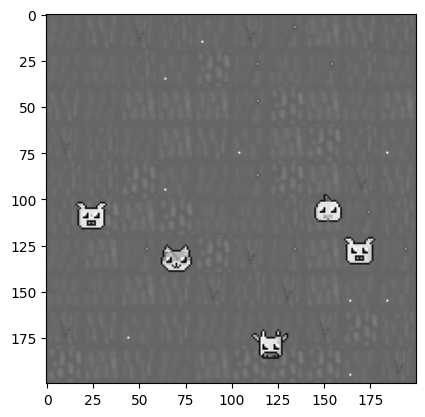

In [478]:
plt.imshow(gray_sum[0], cmap='gray')

In [479]:
def get_rgb_points(val, pic):
    points = []
    for i in range(len(pic)):
        for j in range(len(pic[0])):
            if pic[i,j] == val:
                points.append([i,j])
    return points

In [480]:
coords = list()

for pic in gray_sum:
    coords.append(get_rgb_points(0, pic))

In [490]:
from sklearn.cluster import KMeans
def get_centers(lists):
    kmeans = KMeans(n_clusters=5, random_state=0).fit(lists)
    return kmeans.cluster_centers_

In [491]:
centers=list()
for image in coords: 
    centers.append(get_centers(image))

/Users/thomasgaehtgens/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasgaehtgens/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasgaehtgens/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/thomasgaehtgens/.pyenv/versions/3.11.4/lib/python3.11/site-packages/skle

In [487]:
centers

array([[144.09794073, 141.04629165],
       [ 60.14023334,  41.71468176],
       [ 58.0841496 , 155.77949688],
       [145.67919075,  56.24233666],
       [ 61.01615882,  98.02816251]])

In [492]:
centers

[array([[128.4, 168.6],
        [133.4,  70.4],
        [180.4, 120.6],
        [109.4,  24.4],
        [106.4, 152.4]]),
 array([[ 41.4,  42.6],
        [165.4, 173.6],
        [ 40.4, 175.6],
        [122.4,  61.6],
        [ 24.4,  81.6]]),
 array([[124.4,  74.4],
        [ 82.4, 163.4],
        [151.4,  38.4],
        [ 62.4,  97.6],
        [172.4,  47.4]]),
 array([[102.4, 161.4],
        [161.4,  90.4],
        [ 59.4,  64.6],
        [ 22.4, 170.6],
        [170.4,  51.4]]),
 array([[155.4, 134.4],
        [ 36.4, 134.6],
        [168.4,  61.6],
        [147.4, 172.4],
        [179.4, 116.6]]),
 array([[124.4       , 120.4       ],
        [ 71.4       ,  81.4       ],
        [179.4       , 139.4       ],
        [ 21.33333333,  77.11111111],
        [175.4       ,  93.6       ]]),
 array([[164.4,  62.4],
        [176.4, 176.4],
        [ 88.4,  98.4],
        [152.4,  22.4],
        [178.4,  88.4]]),
 array([[120.4       , 171.4       ],
        [ 21.4       ,  71.6       ],


In [494]:
# convert the centers array to an integer data type
centers_int = centers.astype(np.int)

# save the centers array to a binary file
with open('centers.txt', 'wb') as f:
    centers_int.tofile(f)

AttributeError: 'list' object has no attribute 'astype'

In [495]:
# save y_pred as .txt file
np.savetxt('cdnters.txt', centers, delimiter=',')

ValueError: Expected 1D or 2D array, got 3D array instead